In [ ]:
# # Installing dependencies
# %pip install niapy
# %pip install openpyxl 
# %pip install pillow
# %pip install -U scikit-learn
# %pip install -U seaborn

### Import Libraries

In [50]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [24]:
# Import dataset
dataset_train_raw = pd.read_excel('dataset/boston_train.xlsx')
dataset_train_raw

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.40771,0.0,6.20,1,0.5070,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
1,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
2,6.71772,0.0,18.10,0,0.7130,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4
3,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
4,9.59571,0.0,18.10,0,0.6930,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
400,0.04981,21.0,5.64,0,0.4390,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
401,0.08199,0.0,13.92,0,0.4370,6.009,42.3,5.5027,4,289,16.0,396.90,10.40,21.7
402,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3


In [25]:
dataset_test_raw = pd.read_excel('dataset/boston_test.xlsx')
dataset_test_raw

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
1,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
3,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
4,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.06211,40.0,1.25,0,0.4290,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9
98,0.06911,45.0,3.44,0,0.4370,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5
99,0.09252,30.0,4.93,0,0.4280,6.606,42.2,6.1899,6,300,16.6,383.78,7.37,23.3
100,0.26363,0.0,8.56,0,0.5200,6.229,91.2,2.5451,5,384,20.9,391.23,15.55,19.4


### Data Preprocessing

In [3]:
# Check missing values
dataset_train_raw.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [49]:
dataset_train_raw.PRICE.value_counts()

50.0    13
25.0     8
21.7     6
23.1     6
17.8     5
        ..
48.5     1
31.1     1
41.3     1
28.0     1
23.4     1
Name: PRICE, Length: 202, dtype: int64

In [26]:
# Normalizing data values for data train
normalizer = MinMaxScaler()
normalized_data_train = dataset_train_raw.copy()
cols = normalized_data_train.columns
for col in cols:
    normalized_data_train[col] = normalizer.fit_transform(normalized_data_train[[col]])

normalized_data_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.004512,0.000000,0.210411,1.0,0.251029,0.498755,0.910402,0.202874,0.304348,0.227533,0.510638,0.995814,0.544426,0.352403
1,0.220331,0.000000,0.646628,0.0,0.588477,0.718912,0.978373,0.019744,1.000000,0.913958,0.808511,1.000000,0.323124,0.199085
2,0.075435,0.000000,0.646628,0.0,0.674897,0.610845,0.923790,0.126268,1.000000,0.913958,0.808511,0.000000,0.433499,0.162471
3,0.017002,0.000000,0.700880,1.0,0.452675,0.922399,0.937178,0.109178,0.173913,0.411090,0.223404,0.978693,0.043874,1.000000
4,0.107782,0.000000,0.646628,0.0,0.633745,0.544740,1.000000,0.053870,1.000000,0.913958,0.808511,0.947577,0.512693,0.132723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000155,1.000000,0.081378,0.0,0.063992,0.857061,0.298661,0.421781,0.130435,0.068834,0.223404,0.983988,0.031733,1.000000
400,0.000489,0.221053,0.189883,0.0,0.111111,0.466948,0.190525,0.601210,0.130435,0.105163,0.446809,1.000000,0.184879,0.391304
401,0.000851,0.000000,0.493402,0.0,0.106996,0.469055,0.405767,0.462463,0.130435,0.193117,0.361702,1.000000,0.239238,0.352403
402,0.004153,0.000000,0.371334,1.0,0.213992,0.353133,0.882595,0.268123,0.130435,0.170172,0.638298,0.995814,0.613962,0.297483


In [48]:
normalized_data_train.PRICE.value_counts()

1.000000    13
0.427918     8
0.352403     6
0.384439     6
0.263158     5
            ..
0.965675     1
0.567506     1
0.800915     1
0.496568     1
0.391304     1
Name: PRICE, Length: 202, dtype: int64

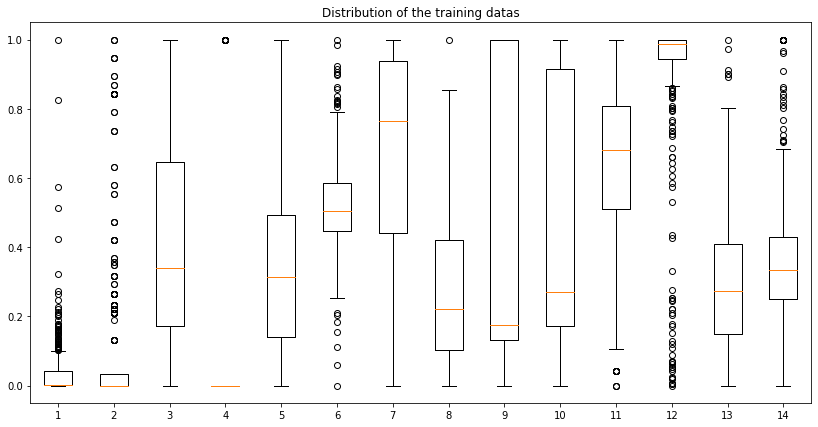

In [38]:
# Check distribution of the data for outliers
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Distribution of the training datas')
ax.boxplot(normalized_data_train)
plt.show()

In [28]:
# Normalizing data values for data train
normalizer = MinMaxScaler()
normalized_data_test = dataset_test_raw.copy()
cols = normalized_data_test.columns
for col in cols:
    normalized_data_test[col] = normalizer.fit_transform(normalized_data_test[[col]])

normalized_data_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.000126,0.175,0.004908,0.0,0.056224,0.646610,0.569149,0.734792,0.086957,0.055344,0.622222,0.990693,0.202266,0.622222
1,0.002028,0.000,0.275953,0.0,0.271784,0.564421,0.786170,0.146113,0.173913,0.375954,0.877778,0.994558,0.247917,0.500000
2,0.368653,0.000,0.636089,0.0,0.630705,0.403096,1.000000,0.037512,1.000000,0.914122,0.800000,1.000000,0.826058,0.013333
3,0.053935,0.000,0.636089,0.0,0.402490,0.473948,0.488298,0.256987,1.000000,0.914122,0.800000,0.978945,0.286571,0.360000
4,0.139931,0.000,0.636089,0.0,0.672199,0.564639,0.937234,0.120383,1.000000,0.914122,0.800000,0.007705,0.557481,0.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000753,0.400,0.000000,0.0,0.082988,0.512753,0.408511,0.695444,0.000000,0.282443,0.744444,1.000000,0.133289,0.397778
98,0.000856,0.450,0.082673,0.0,0.099585,0.567037,0.263830,0.484244,0.173913,0.402672,0.244444,0.981716,0.090303,0.566667
99,0.001201,0.300,0.138920,0.0,0.080913,0.538042,0.385106,0.457766,0.217391,0.215649,0.400000,0.966637,0.179607,0.406667
100,0.003721,0.000,0.275953,0.0,0.271784,0.455853,0.906383,0.124858,0.173913,0.375954,0.877778,0.985582,0.452183,0.320000


In [29]:
# Label and Feature grouping
train_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train = normalized_data_train[train_features]
y_train = normalized_data_train['PRICE']
X_test = normalized_data_test[train_features]
y_test = normalized_data_test['PRICE']

In [30]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.004512,0.000000,0.210411,1.0,0.251029,0.498755,0.910402,0.202874,0.304348,0.227533,0.510638,0.995814,0.544426
1,0.220331,0.000000,0.646628,0.0,0.588477,0.718912,0.978373,0.019744,1.000000,0.913958,0.808511,1.000000,0.323124
2,0.075435,0.000000,0.646628,0.0,0.674897,0.610845,0.923790,0.126268,1.000000,0.913958,0.808511,0.000000,0.433499
3,0.017002,0.000000,0.700880,1.0,0.452675,0.922399,0.937178,0.109178,0.173913,0.411090,0.223404,0.978693,0.043874
4,0.107782,0.000000,0.646628,0.0,0.633745,0.544740,1.000000,0.053870,1.000000,0.913958,0.808511,0.947577,0.512693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000155,1.000000,0.081378,0.0,0.063992,0.857061,0.298661,0.421781,0.130435,0.068834,0.223404,0.983988,0.031733
400,0.000489,0.221053,0.189883,0.0,0.111111,0.466948,0.190525,0.601210,0.130435,0.105163,0.446809,1.000000,0.184879
401,0.000851,0.000000,0.493402,0.0,0.106996,0.469055,0.405767,0.462463,0.130435,0.193117,0.361702,1.000000,0.239238
402,0.004153,0.000000,0.371334,1.0,0.213992,0.353133,0.882595,0.268123,0.130435,0.170172,0.638298,0.995814,0.613962


### Modelling